In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

In [25]:
# Load the data from the desired file
data3 = pd.read_csv('/content/drive/MyDrive/bank-additional/bank-additional-full.csv', sep=';')  # Replace with the desired file name

In [26]:
data3.shape

(41188, 21)

In [27]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
data3.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
data3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
data3.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [31]:
NumericalCol3 = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
CategoricalCol3 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

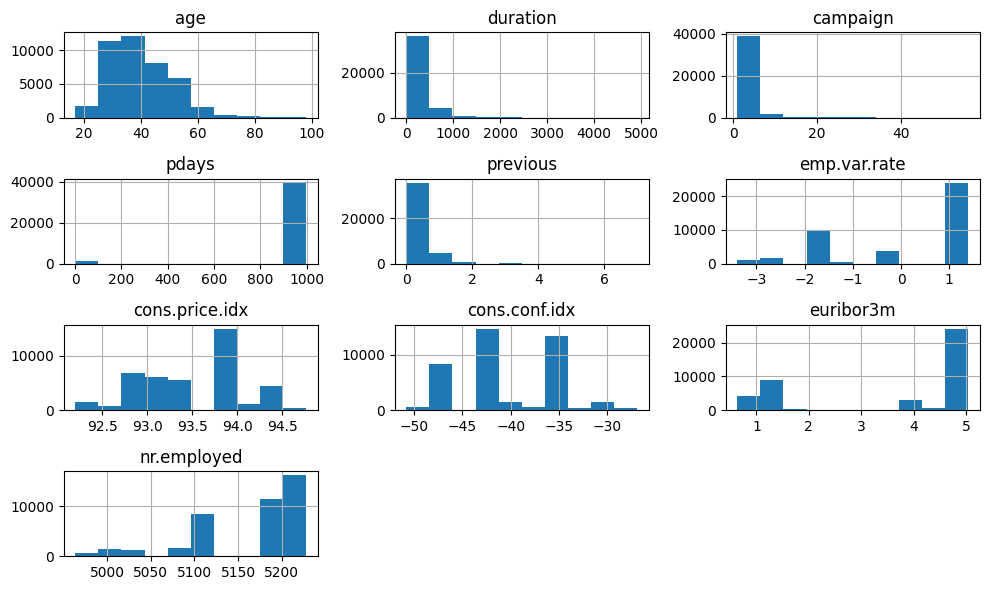

In [32]:
# Data distribution visualizations
data3[NumericalCol3].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [33]:
# Calculate skewness for each numerical column
skewness = data3[NumericalCol3].skew()


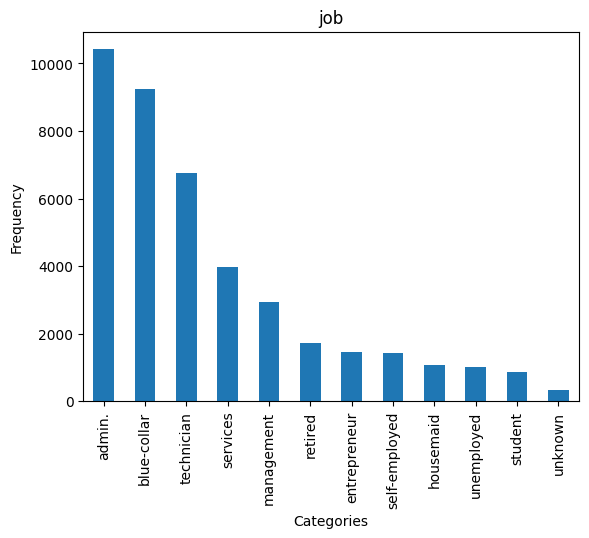

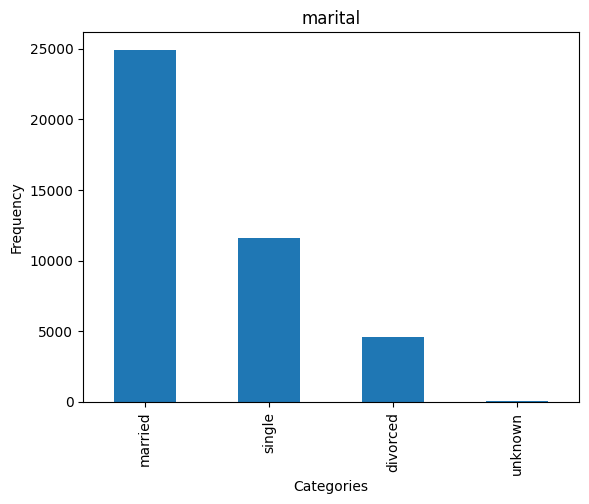

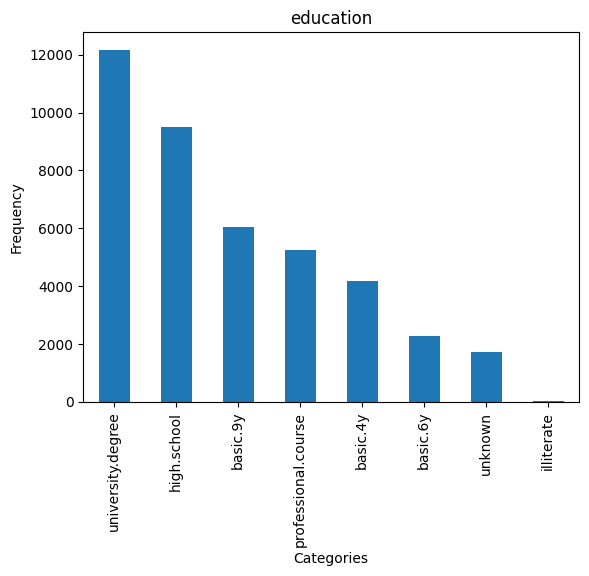

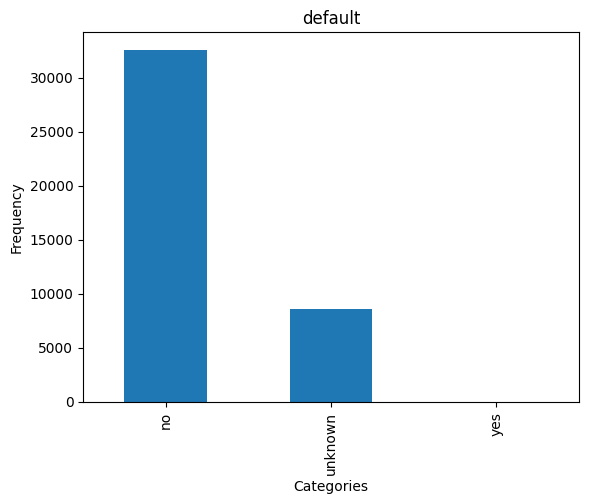

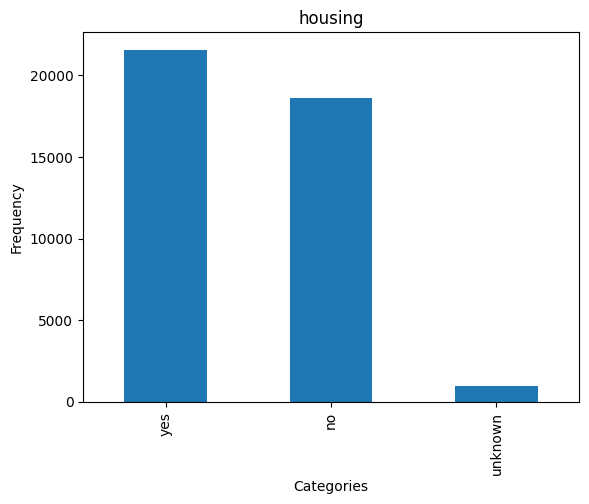

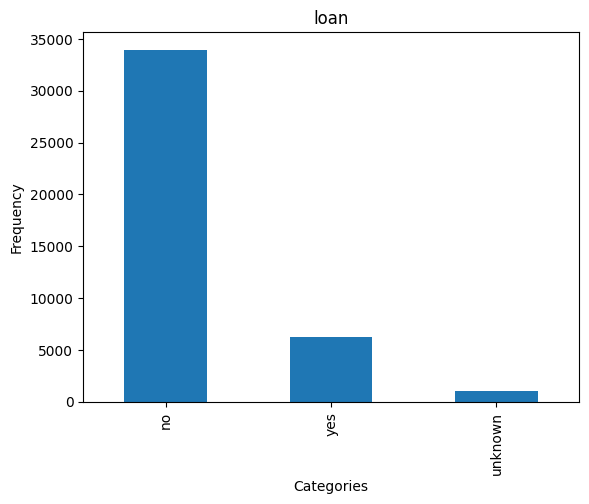

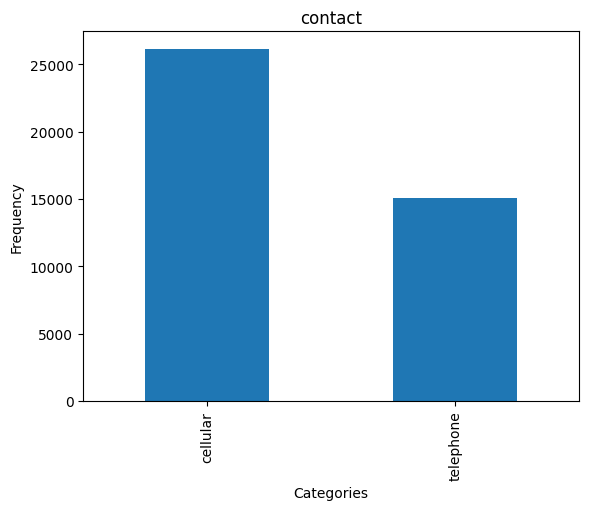

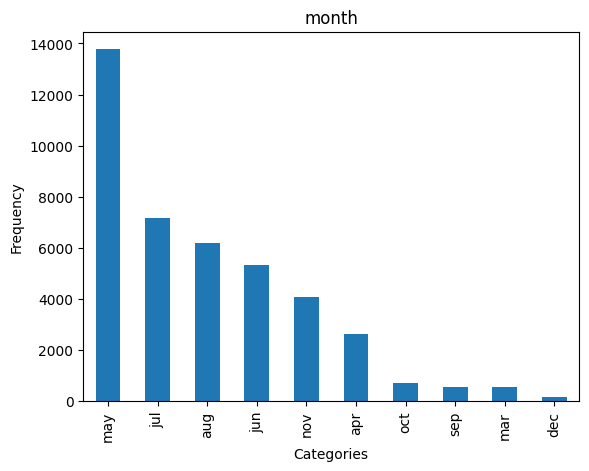

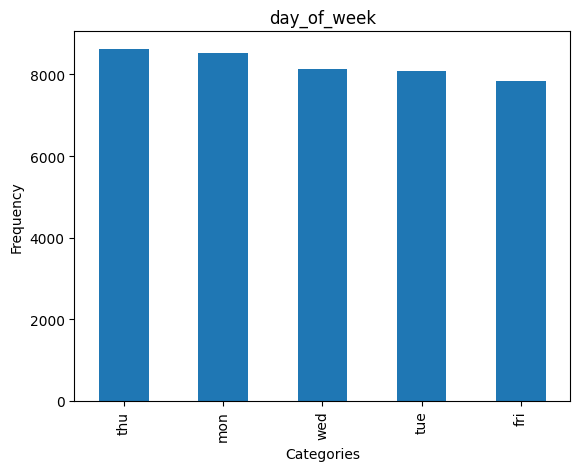

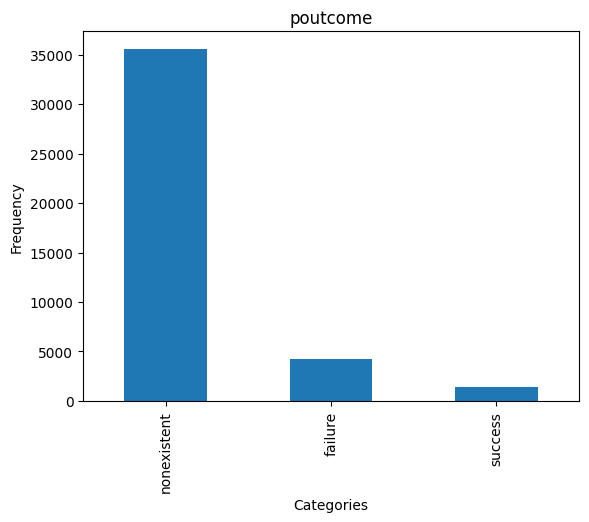

In [34]:
for column in CategoricalCol3:
    data3[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-35-e91144b9ee84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix3 = data3.corr()


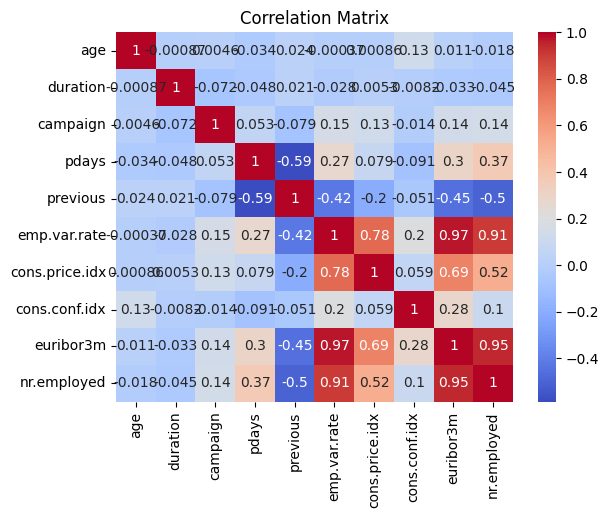

In [35]:
# Calculate the correlation matrix
corr_matrix3 = data3.corr()
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

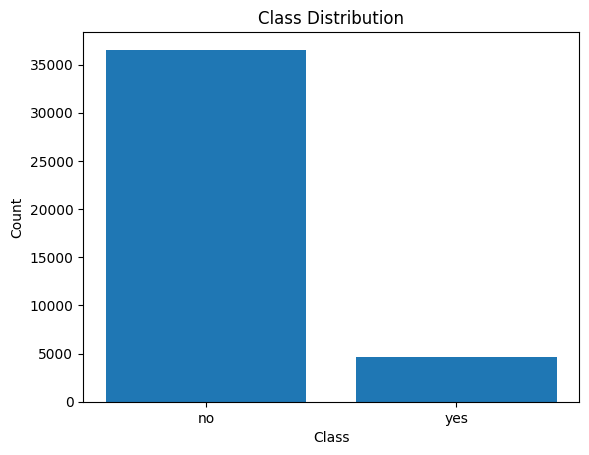

In [36]:
# Count the number of occurrences for each class
class_counts3 = data3['y'].value_counts()

# Plot the class distribution
plt.bar(class_counts3.index, class_counts3.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

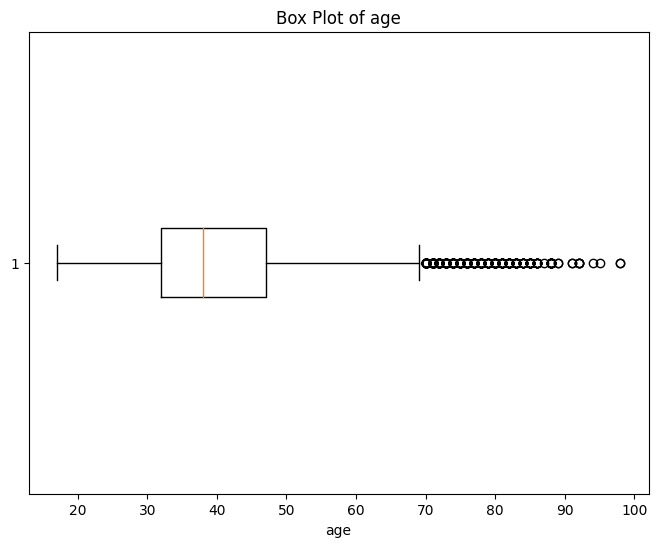

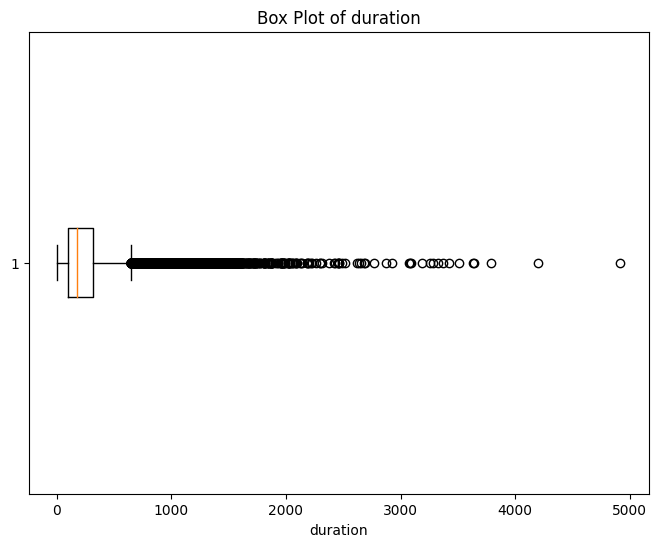

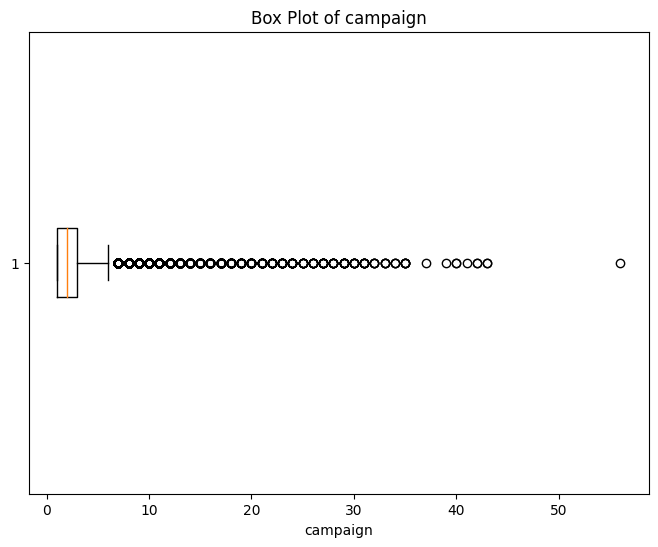

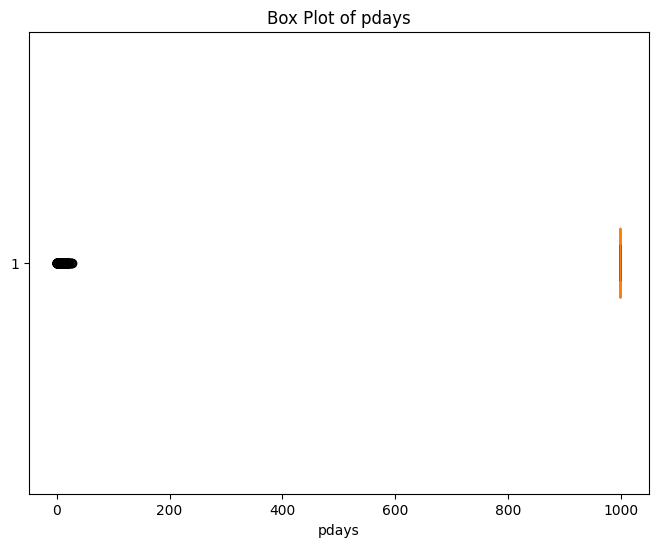

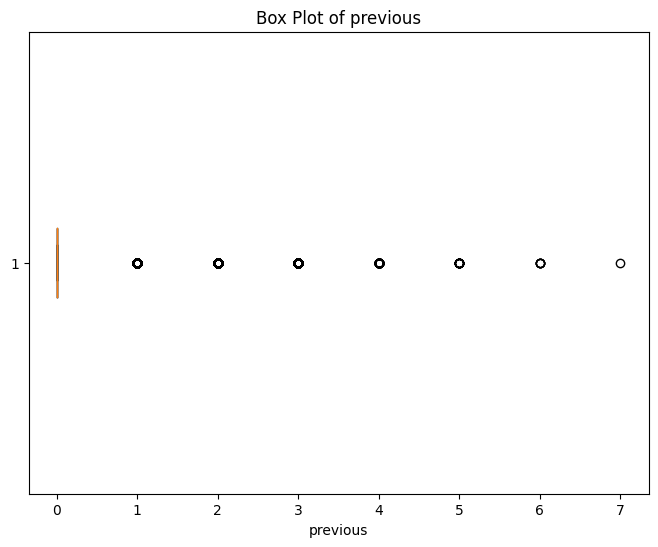

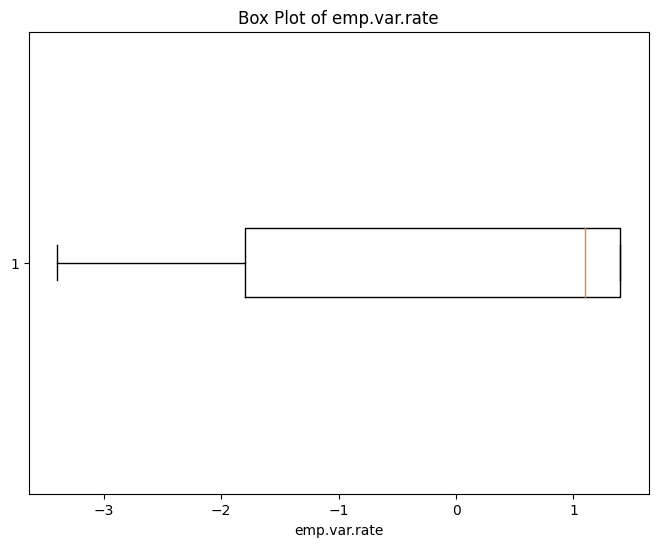

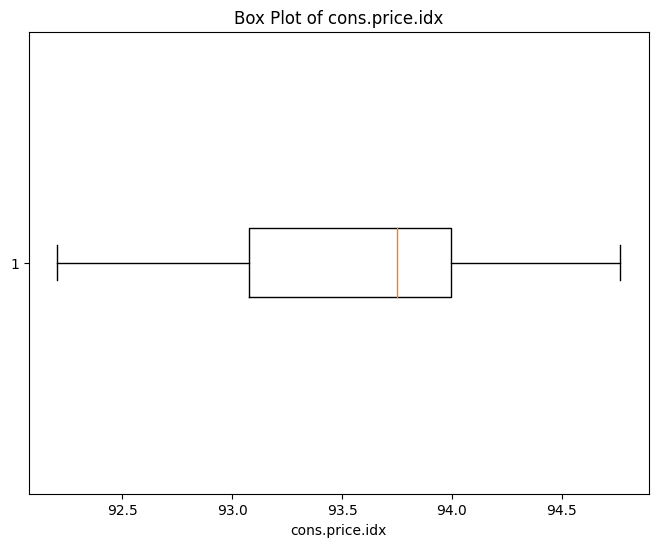

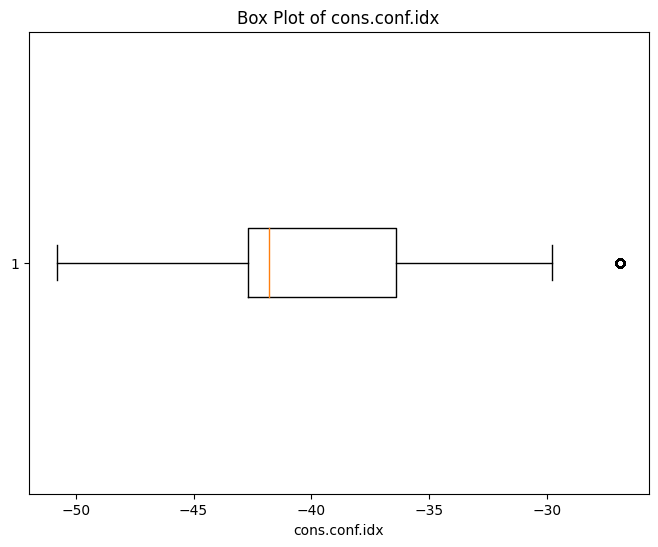

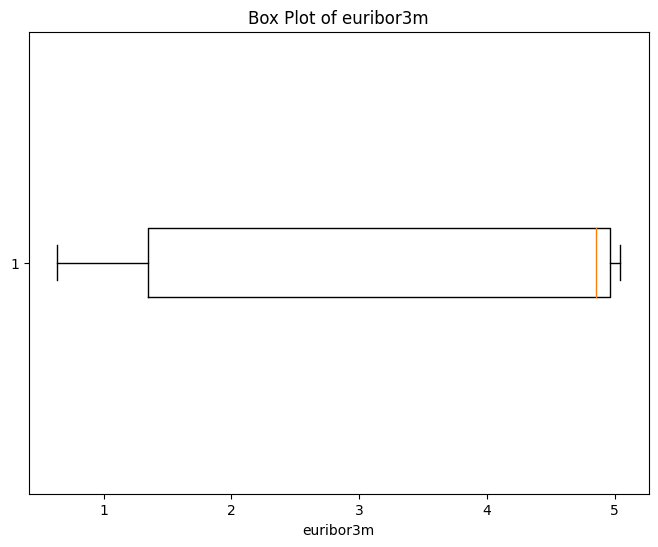

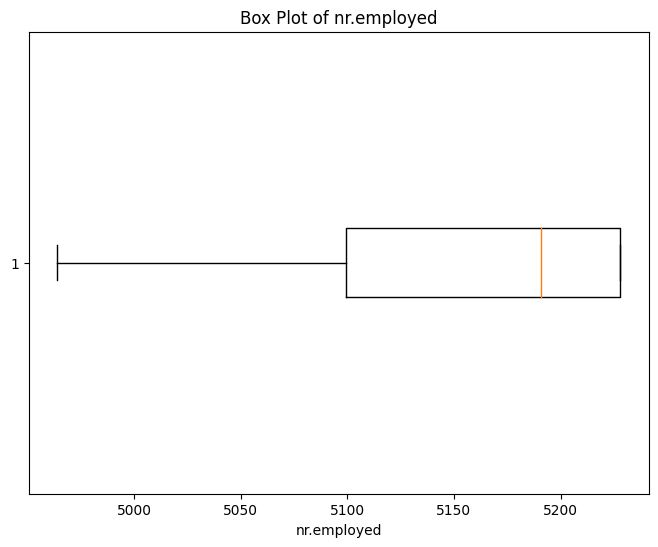

Number of outliers in age : 369
Number of outliers in duration : 861
Number of outliers in campaign : 869
Number of outliers in pdays : 1515
Number of outliers in previous : 1064
Number of outliers in emp.var.rate : 0
Number of outliers in cons.price.idx : 0
Number of outliers in cons.conf.idx : 0
Number of outliers in euribor3m : 0
Number of outliers in nr.employed : 0


In [37]:
# Define the threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Dictionary to store the number of outliers for each feature
outlier_counts3 = {}

# Loop through each numerical column
for column_name in NumericalCol3:
    # Calculate the z-scores for the column
    z_scores3 = np.abs((data3[column_name] - data3[column_name].mean()) / data3[column_name].std())

    # Identify outliers
    outliers3 = data3[z_scores3 > threshold]

    # Count the number of outliers for the current feature
    num_outliers3 = len(outliers3)

    # Store the number of outliers in the dictionary
    outlier_counts3[column_name] = num_outliers3


    # Generate a box plot to visualize the distribution and potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data3[column_name], vert=False)
    plt.title('Box Plot of ' + column_name)
    plt.xlabel(column_name)
    plt.show()


# Print the number of outliers for each feature
for column_name, num_outliers3 in outlier_counts3.items():
    print("Number of outliers in", column_name, ":", num_outliers3)

In [38]:
X3 = data3.drop("y", axis=1)


In [39]:
y3 = data3["y"]


We need to OneHotEncode the data to be able to use SMOTE approach to balance the dataset.



In [40]:
categorical_cols3 = X3.select_dtypes(include=["object"]).columns.tolist()


In [42]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on the categorical columns
encoder3 = OneHotEncoder(sparse=False, handle_unknown="ignore")
X_encoded3 = encoder3.fit_transform(X3[categorical_cols3])

# Get the column names for the encoded features
encoded_cols3 = []
for i, col in enumerate(categorical_cols3):
    unique_values3 = X3[col].unique()
    for value in unique_values3:
        encoded_cols3.append(f"{col}_{value}")

# Create a DataFrame with the encoded features
X_encoded3 = pd.DataFrame(X_encoded3, columns=encoded_cols3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
X_processed3 = pd.concat([X3.select_dtypes(exclude=["object"]), X_encoded3], axis=1)


In [44]:
smote = SMOTE()
X_resampled3, y_resampled3 = smote.fit_resample(X_processed3, y3)

In [ ]:
 Split the data into input features (X) and target variable (y)
X = data.drop('y', axis=1)  # Exclude the 'y' column from the input features
y = data['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)